# One sample

In [ ]:
!gdown --id 1BOgseHn1k2WH10A1f2L__GtyhMsMXCfl

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BOgseHn1k2WH10A1f2L__GtyhMsMXCfl
To: /content/iris_full.csv
100% 2.06k/2.06k [00:00<00:00, 2.08MB/s]


In [ ]:
import numpy as np
#import tensorflow as tf
import torch

# Data preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = torch.tensor(data[:,0:4], requires_grad=True, dtype = torch.float)
y = torch.tensor(data[:,4:], requires_grad=True, dtype = torch.float)
N = X.shape[0]

X = torch.cat((torch.ones((N, 1)), X), dim=1)

print(X[:5])
print(y[:5])

tensor([[1.0000, 5.1000, 3.5000, 1.4000, 0.2000],
        [1.0000, 4.9000, 3.0000, 1.4000, 0.2000],
        [1.0000, 4.7000, 3.2000, 1.3000, 0.2000],
        [1.0000, 4.6000, 3.1000, 1.5000, 0.2000],
        [1.0000, 5.0000, 3.6000, 1.4000, 0.2000]], grad_fn=<SliceBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)


In [ ]:
# theta
theta = torch.tensor([[0.01],
                     [-0.04], 
                     [0.02], 
                     [-0.03], 
                     [0.001]], requires_grad=True, dtype = torch.float)
 
# forward
def compute_output(theta, X):
    z = theta.T @X
    return torch.sigmoid(z)

In [ ]:
# parameters
lr = 0.001
num_epochs = 100
loss_fn = torch.nn.BCELoss()

losses = []

In [ ]:
# training
for epoch in range(num_epochs):
    for x_data, y_data in zip(X, y):
        # reshape -> (5,1)
        x_data = torch.reshape(x_data, (-1,1))
        
        # y_hat
        y_hat = compute_output(theta, x_data)
        #print(y_data, y_hat)
        #break
        # loss
        loss = loss_fn(y_hat.reshape(-1,), y_data)
            
        losses.append(loss.item())            

        # gradient
        loss.backward()
        # update
        with torch.no_grad():
          theta -= lr*theta.grad
          theta.grad.zero_()

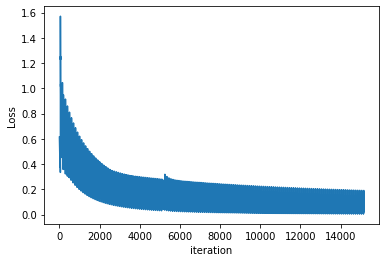

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()